In [1]:
import numpy as np

#meain variance of motion, rot + traslation for all files in the interest folder
import pandas as pd
import numpy as np
import os
from scipy.stats import spearmanr, rankdata

def cleanTuples(tup):
    ignore = ["spine.001POSX","spine.001POSY", "spine.001POSZ", "foot.LPOSX","foot.LPOSY","foot.LPOSZ", 
                "foot.RPOSX","foot.RPOSY","foot.RPOSZ", "heel.02.LPOSX", "heel.02.LPOSY", "heel.02.LPOSZ",
                "heel.02.RPOSX", "heel.02.RPOSY", "heel.02.RPOSZ"]
    return [x for x in tup if x[0] not in ignore]

def find_rank(n, tup):
    for i, x in enumerate(tup):
        if x[0] == n.strip():
            if x[1] == 0:
                return 0
            return i + 1
        
def giveBackVariance(tup, n):
    for x in tup:
        if x[0] == n.strip():
            return x[1]
    return 0

def findAllByFile(rx, ry, rz, px, py, pz, file):
    rx = sorted(rx, key=lambda x: x[2])
    ry = sorted(ry, key=lambda x: x[2])
    rz = sorted(rz, key=lambda x: x[2])
    px = sorted(px, key=lambda x: x[2])
    py = sorted(py, key=lambda x: x[2])
    pz = sorted(pz, key=lambda x: x[2])
    r = []
    for rrx, rry, rrz, ppx, ppy, ppz in zip(rx, ry, rz, px, py, pz):
        if rrx[2] == file:
            r.append(rrx)
            r.append(rry)
            r.append(rrz)
            r.append(ppx)
            r.append(ppy)
            r.append(ppz)
    return r

interestFolder = "idle"
dirFiles = '/analysis/metrics/varianceMean/' + interestFolder
varNames = pd.read_csv("/analysis/varNames.csv")

#turn the varNames into a list
varNames = varNames["Variable"].tolist()
globalRDf = pd.read_csv("./metrics/idleRotationVariance.csv")
globalPDf = pd.read_csv("./metrics/idleTranslationVariance.csv")

#extract the global variance for each axis in tuples like this (name, variance)
tupRX = []
tupRY = []
tupRZ = []
tupPX = []
tupPY = []
tupPZ = []

#extract the global variance for each axis in tuples like this (name, variance) for each axis
for n in varNames:
    globalXrotRow = globalRDf.loc[globalRDf['Variable'] == n.strip()]
    globalYrotRow = globalRDf.loc[globalRDf['Variable'] == n.strip()]
    globalZrotRow = globalRDf.loc[globalRDf['Variable'] == n.strip()]

    globalXrotVar = globalXrotRow['X'].values[0] if not globalXrotRow.empty else 0
    globalYrotVar = globalYrotRow['Y'].values[0] if not globalYrotRow.empty else 0
    globalZrotVar = globalZrotRow['Z'].values[0] if not globalZrotRow.empty else 0

    globalXposRow = globalPDf.loc[globalPDf['Variable'] == n.strip()]
    globalYposRow = globalPDf.loc[globalPDf['Variable'] == n.strip()]
    globalZposRow = globalPDf.loc[globalPDf['Variable'] == n.strip()]

    globalXposVar = globalXposRow['X'].values[0] if not globalXposRow.empty else 0
    globalYposVar = globalYposRow['Y'].values[0] if not globalYposRow.empty else 0
    globalZposVar = globalZposRow['Z'].values[0] if not globalZposRow.empty else 0


    tupRX.append((n.strip()+ "ROTX", globalXrotVar))
    tupRY.append((n.strip()+ "ROTY", globalYrotVar))
    tupRZ.append((n.strip()+ "ROTZ", globalZrotVar))

    tupPX.append((n.strip()+ "POSX", globalXposVar))
    tupPY.append((n.strip()+ "POSY", globalYposVar))
    tupPZ.append((n.strip()+ "POSZ", globalZposVar))


#sort the tuples by variance, this will establish the rank
tupRX = sorted(tupRX, key=lambda x: x[1])
tupRY = sorted(tupRY, key=lambda x: x[1])
tupRZ = sorted(tupRZ, key=lambda x: x[1])

tupPX = sorted(tupPX, key=lambda x: x[1])
tupPY = sorted(tupPY, key=lambda x: x[1])
tupPZ = sorted(tupPZ, key=lambda x: x[1])

#the correlation should be performed as following, for each idle file, extract the variance for a given joint and axis, store in a list in the form of a tuple (name, variance, filename) and then sort the list by variance, the rank will be the index + 1
#the correlation will be performed between the rank of the variance of the global motion and the rank of the variance of the motion of the file. 
tupRXFile = []
tupRYFile = []
tupRZFile = []
tupPXFile = []
tupPYFile = []
tupPZFile = []
for file in sorted(os.listdir(dirFiles)):
    if file.endswith(".csv"):
        df = pd.read_csv(dirFiles + "/" + file)
        df = df.iloc[1:]
        #extract the variance for each axis in tuples like this (name, variance, filename)

        for n in varNames:
            xrot = n.strip() + " XROT"
            yrot = n.strip() + " YROT"
            zrot = n.strip() + " ZROT"

            xpos = n.strip() + " XPOS"
            ypos = n.strip() + " YPOS"
            zpos = n.strip() + " ZPOS"

            xrotRow = df.loc[df['Variable'] == xrot]
            yrotRow = df.loc[df['Variable'] == yrot]
            zrotRow = df.loc[df['Variable'] == zrot]

            xposRow = df.loc[df['Variable'] == xpos]
            yposRow = df.loc[df['Variable'] == ypos]
            zposRow = df.loc[df['Variable'] == zpos]

            xrotVar = xrotRow['variance'].values[0] if not xrotRow.empty else 0
            yrotVar = yrotRow['variance'].values[0] if not yrotRow.empty else 0
            zrotVar = zrotRow['variance'].values[0] if not zrotRow.empty else 0

            xposVar = xposRow['variance'].values[0] if not xposRow.empty else 0
            yposVar = yposRow['variance'].values[0] if not yposRow.empty else 0
            zposVar = zposRow['variance'].values[0] if not zposRow.empty else 0

            tupRXFile.append((n.strip()+ "ROTX", xrotVar, file))
            tupRYFile.append((n.strip()+ "ROTY", yrotVar, file))
            tupRZFile.append((n.strip()+ "ROTZ", zrotVar, file))

            tupPXFile.append((n.strip()+ "POSX", xposVar, file))
            tupPYFile.append((n.strip()+ "POSY", yposVar, file))
            tupPZFile.append((n.strip()+ "POSZ", zposVar, file))


globalJointTuple = tupRX + tupRY + tupRZ + tupPX + tupPY + tupPZ

#sort the global joint tuple by variance
globalJointTuple = sorted(globalJointTuple, key=lambda x: x[1])

globalJointTuple = cleanTuples(globalJointTuple)

            


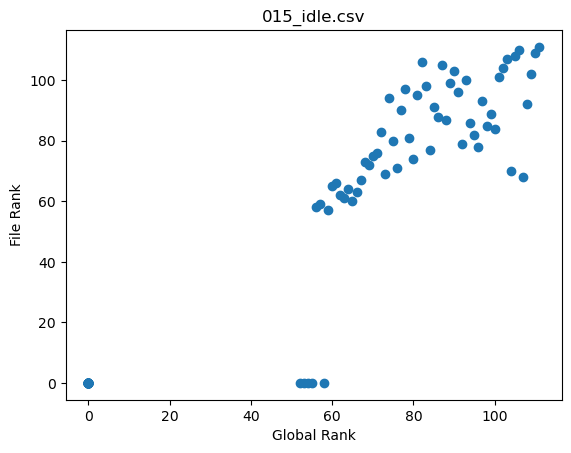

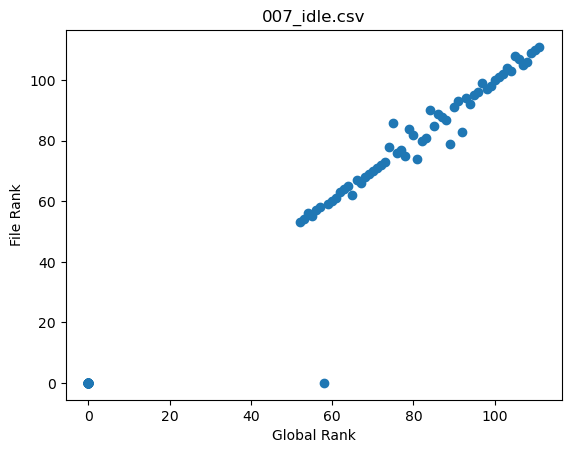

In [12]:
#plot for the max and the mean
import matplotlib.pyplot as plt
maxMinFiles = ["015_idle.csv", "007_idle.csv"]
axisRP = ["ROTX", "ROTY", "ROTZ", "POSX", "POSY", "POSZ"]

for file in maxMinFiles:
    #find all the tuples for the same joint and axis put it in a list and sort it by variance
    fileJointTuple = findAllByFile(tupRXFile, tupRYFile, tupRZFile, tupPXFile, tupPYFile, tupPZFile, file)
    fileJointTuple = sorted(fileJointTuple, key=lambda x: x[1])
    fileJointTuple = cleanTuples(fileJointTuple)
    #get the index of the joint and axis in the global motion list, the ran is just a number which is the index in the sorted list + 1
    pointsX = []
    pointsY = []
    for n in varNames:    
        for a in axisRP:
            globalRank = find_rank(n.strip() + a, globalJointTuple)
            fileRank = find_rank(n.strip() + a, fileJointTuple)
            pointsX.append(globalRank)
            pointsY.append(fileRank)
    plt.scatter(pointsX, pointsY)
    plt.xlabel("Global Rank")
    plt.ylabel("File Rank")
    plt.title(f"{file}")
    plt.show()
        



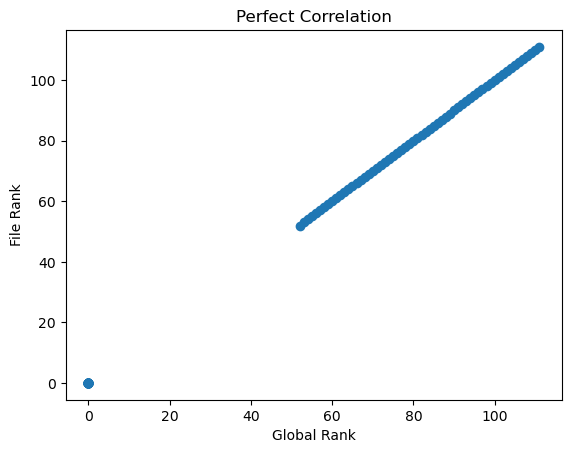

In [4]:
#extract a plot with the perfect correlation, just use x,y as the same rank value for each joint and axis
pointsX = []
pointsY = []
axisRP = ["ROTX", "ROTY", "ROTZ", "POSX", "POSY", "POSZ"]
for n in varNames:    
    for a in axisRP:
        globalRank = find_rank(n.strip() + a, globalJointTuple)
        pointsX.append(globalRank)
        pointsY.append(globalRank)
plt.scatter(pointsX, pointsY)
plt.xlabel("Global Rank")
plt.ylabel("File Rank")
plt.title("Perfect Correlation")
plt.show()

In [ ]:
#get the same plots but instead of using the rank use the variance as, x the variance of the global motion 
#and y the variance of the motion of the file, do it only for the max and min files, but normalize the variance
#to be between 0 and 1
maxMinFiles = ["015_idle.csv", "007_idle.csv"]
for file in maxMinFiles:
    #find all the tuples for the same joint and axis put it in a list and sort it by variance
    fileJointTuple = findAllByFile(tupRXFile, tupRYFile, tupRZFile, tupPXFile, tupPYFile, tupPZFile, file)
    fileJointTuple = sorted(fileJointTuple, key=lambda x: x[1])
    #get the index of the joint and axis in the global motion list, the ran is just a number which is the index in the sorted list + 1
    pointsX = []
    pointsY = []
    for n in varNames:    
        for a in axisRP:
            #globalrank should be the variance value of joint n in axis a
            globalRank = giveBackVariance(globalJointTuple, n.strip() + a)
            fileRank = giveBackVariance(fileJointTuple, n.strip() + a)
            pointsX.append(globalRank)
            pointsY.append(fileRank)
    pointsX = np.array(pointsX)
    pointsY = np.array(pointsY)
    pointsX = (pointsX - pointsX.min())/(pointsX.max() - pointsX.min())
    pointsY = (pointsY - pointsY.min())/(pointsY.max() - pointsY.min())

    plt.scatter(pointsX, pointsY)
    plt.xlabel("Global Rank")
    plt.ylabel("File Rank")
    plt.title(f"{file}")
    plt.show()


In [5]:
#do the same but use spearman function from scipy
from scipy.stats import spearmanr

axisRP = ["ROTX", "ROTY", "ROTZ", "POSX", "POSY", "POSZ"]
rhoList = []
for file in sorted(os.listdir(dirFiles)):
    #find all the tuples for the same joint and axis put it in a list and sort it by variance
    fileJointTuple = findAllByFile(tupRXFile, tupRYFile, tupRZFile, tupPXFile, tupPYFile, tupPZFile, file)
    fileJointTuple = sorted(fileJointTuple, key=lambda x: x[1])
    fileJointTuple = cleanTuples(fileJointTuple)
    #extract the global variance values as a list
    globalVar = []
    fileVar = []
    for n in varNames:
        for a in axisRP:
            globalVar.append(giveBackVariance(globalJointTuple, n.strip() + a))
            fileVar.append(giveBackVariance(fileJointTuple, n.strip() + a))

    
    rho, _ = spearmanr(globalVar, fileVar)
    
    print(f"{file}: {rho}")
    rhoList.append((rho, file))

rhoList = sorted(rhoList, key=lambda x: x[0])
minRho = rhoList[0]
print(f"minRho: {minRho}")
maxRho = rhoList[-1]
print(f"maxRho: {maxRho}")
rhoList = [x[0] for x in rhoList]
meanRho = np.mean(rhoList)
print(f"meanRho: {meanRho}")

000_idle.csv: 0.9884518104056822
002_idle.csv: 0.9863857563754954
003_idle.csv: 0.9886909431810696
005_idle.csv: 0.982149786621778
007_idle.csv: 0.9927843218546247
008_idle.csv: 0.9914866703011287
009_idle.csv: 0.9911437861115532
010_idle.csv: 0.9569518613564147
011_idle.csv: 0.983962731505446
012_idle.csv: 0.9861536565073339
014_idle.csv: 0.9887102455692289
015_idle.csv: 0.9522823968921453
016_idle.csv: 0.9911315041534066
minRho: (0.9522823968921453, '015_idle.csv')
maxRho: (0.9927843218546247, '007_idle.csv')
meanRho: 0.9830988823719468


015_idle.csv: 0.9522823968921453


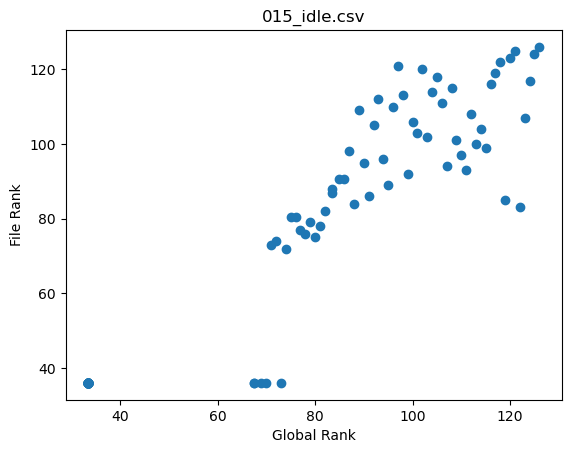

007_idle.csv: 0.9927843218546247


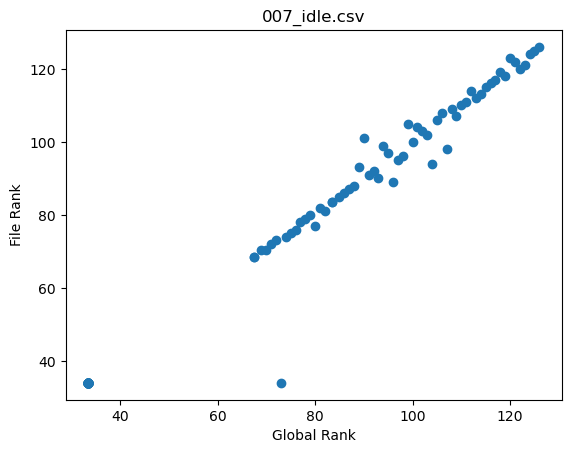

In [8]:
#plot this results using the rank used by spearmanr function
import matplotlib.pyplot as plt
maxMinFiles = ["015_idle.csv", "007_idle.csv"]
globalJointTuple = cleanTuples(globalJointTuple)
for file in maxMinFiles:
    #find all the tuples for the same joint and axis put it in a list and sort it by variance
    fileJointTuple = findAllByFile(tupRXFile, tupRYFile, tupRZFile, tupPXFile, tupPYFile, tupPZFile, file)
    fileJointTuple = sorted(fileJointTuple, key=lambda x: x[1])
    fileJointTuple = cleanTuples(fileJointTuple)
    #extract the global variance values as a list
    globalVar = []
    fileVar = []
    for n in varNames:
        for a in axisRP:
            globalVar.append(giveBackVariance(globalJointTuple, n.strip() + a))
            fileVar.append(giveBackVariance(fileJointTuple, n.strip() + a))
    rho, _ = spearmanr(globalVar, fileVar)
    print(f"{file}: {rho}")
    plt.scatter(rankdata(globalVar), rankdata(fileVar))
    plt.xlabel("Global Rank")
    plt.ylabel("File Rank")
    plt.title(f"{file}")
    plt.show()

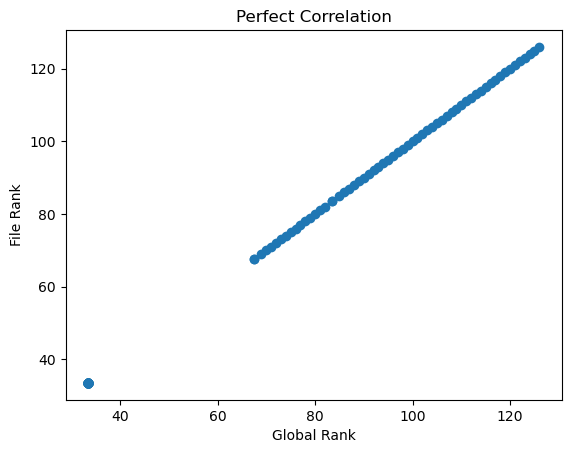

In [11]:
#perfect correlation according to rand_data
pointsX = []
pointsY = []
globalJointTuple = cleanTuples(globalJointTuple)
for n in varNames:    
    for a in axisRP:
        globalRank = giveBackVariance(globalJointTuple, n.strip() + a)
        pointsX.append(globalRank)
        pointsY.append(globalRank)
plt.scatter(rankdata(pointsX), rankdata(pointsY))
plt.xlabel("Global Rank")
plt.ylabel("File Rank")
plt.title("Perfect Correlation")
plt.show()
